In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pywt
from pywt import wavedec

# **Generate a real chirp signal.**

In [3]:
def ChirpSignal(t,f0,t1,f1,phase=0):
  t0=t[0]
  T=t1-t0
  k=(f1-f0)/T
  x=np.cos(2*np.pi*(k/2*t+f0)*t+phase)
  return x


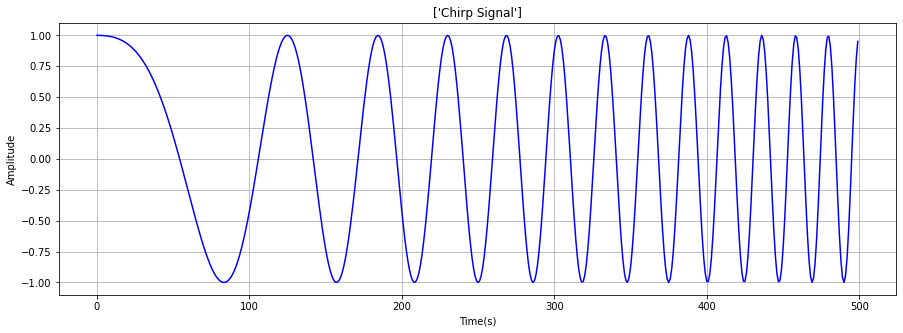

In [22]:
fs=500 #sampling frequency
t=np.arange(0,1,1/fs) #time base - upto 1 second

f0=1 # starting frequency of the chirp
f1=fs/20 #frequency of the chirp at t1=1 second
x=ChirpSignal(t,f0,1,f1)

plt.figure(figsize=(15,5))
plt.plot(x,'b')
plt.title(['Chirp Signal'])
plt.xlabel('Time(s)');
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# **decomposition of this signal upto three levels**

<Figure size 432x288 with 0 Axes>

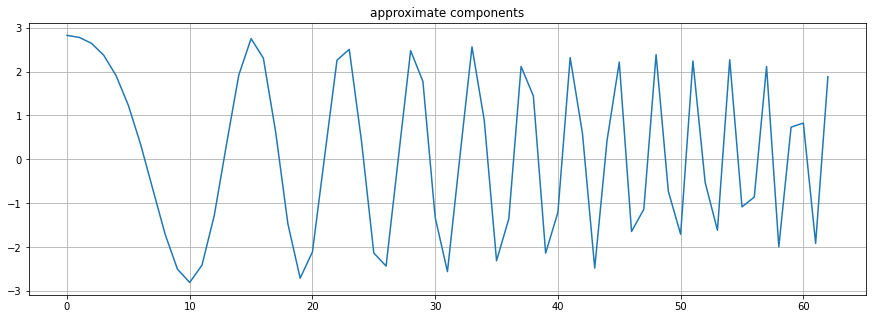

<Figure size 432x288 with 0 Axes>

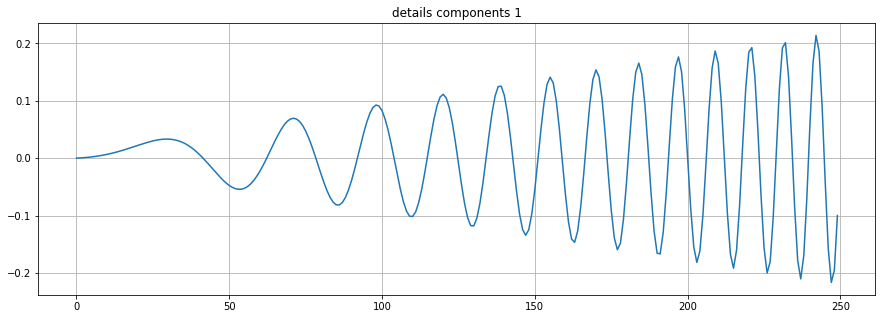

<Figure size 432x288 with 0 Axes>

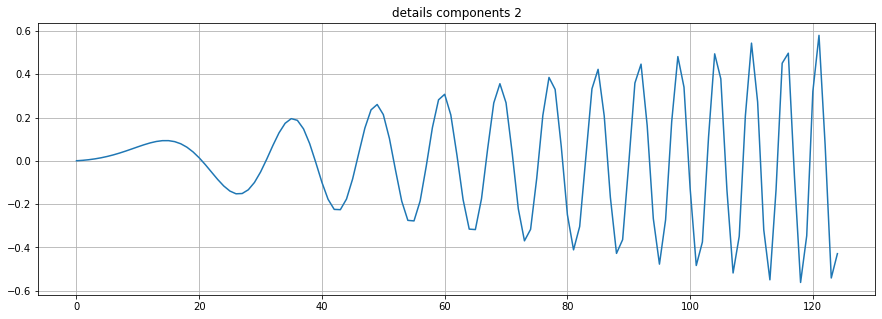

<Figure size 432x288 with 0 Axes>

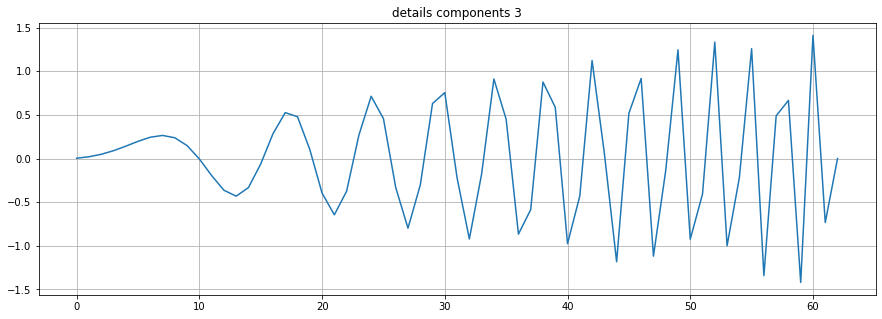

In [23]:
coeffs = wavedec(x, 'db1', level=3)
approx_det,coeff_det3,coeff_det2,coeff_det1=coeffs
plt.figure(1)
plt.figure(figsize=(15,5))
plt.plot(approx_det)
plt.title("approximate components")
plt.grid()
plt.show()
plt.figure(2)
plt.figure(figsize=(15,5))
plt.plot(coeff_det1)
plt.title("details components 1")
plt.grid()
plt.show()
plt.figure(3)
plt.figure(figsize=(15,5))
plt.plot(coeff_det2)
plt.title("details components 2")
plt.grid()
plt.show()
plt.figure(4)
plt.figure(figsize=(15,5))
plt.plot(coeff_det3)
plt.title("details components 3")
plt.grid()
plt.show()


#2.HeaviSine signal
The signal
is added with AWGN and a noisy signal is generated with SNR of 15 dB.

<Figure size 432x288 with 0 Axes>

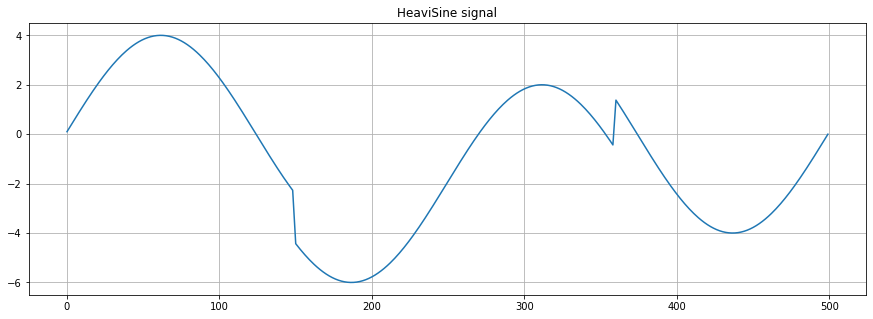

<Figure size 432x288 with 0 Axes>

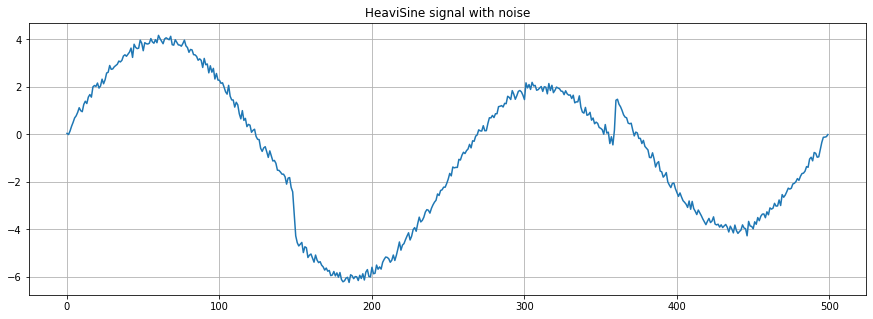

In [34]:
HeaviSine_signal=pywt.data.demo_signal(name='HeaviSine', n=500)
#adding 15 db SNR noise in HeaviSine signal
x_watts=x**2
x_avg_watts = np.mean(x_watts)
x_avg_db = 10 * np.log10(x_avg_watts)

# Adding noise using target SNR

# Set a target SNR
target_snr_db = 15

noise_avg_db = x_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)

mean_noise = 0
noise = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))

# Noise up the original signal (again) and plot
noise_signal = HeaviSine_signal + noise
plt.figure(1)
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(HeaviSine_signal)
plt.title("HeaviSine signal")
plt.show()
plt.figure(2)
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(noise_signal)
plt.title("HeaviSine signal with noise")
plt.show()

decomposition of this noise signal upto five levels

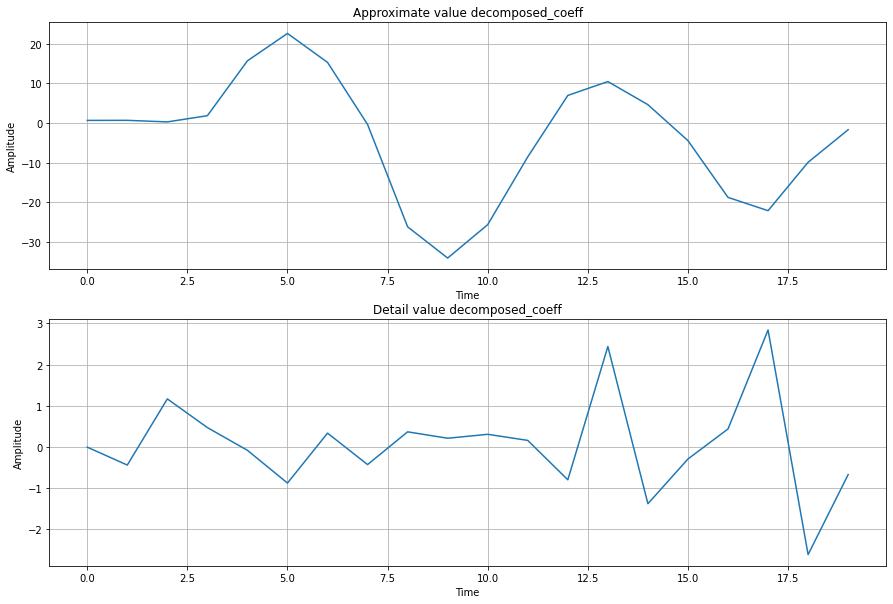

In [39]:
approx_coeff= pywt.downcoef('a',noise_signal , 'db3', mode='sym', level=5)
detail_coeff = pywt.downcoef('d',noise_signal , 'db3', mode='sym', level=5)

decomposed_coeff= [approx_coeff,detail_coeff]
title_name= ["Approximate value","Detail value"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(decomposed_coeff)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(decomposed_coeff[k])
    plt.title(str(title_name[k])+" decomposed_coeff")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid()
    c =c+1 

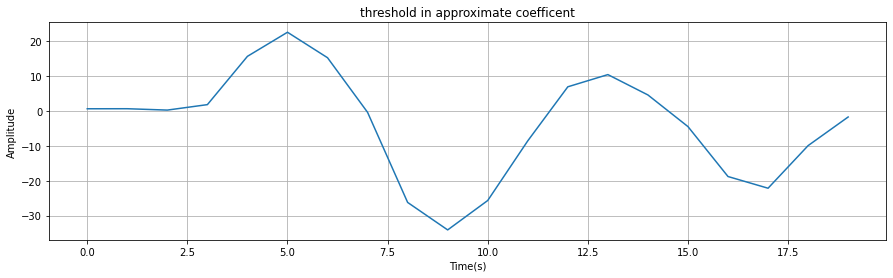

In [40]:
sigma_Approx = (np.median(approx_coeff)/0.6745)

threshold_Approx = sigma_Approx*(np.sqrt(2*np.log(len(approx_coeff))))

approxi_thres = pywt.threshold(approx_coeff,threshold_Approx,mode= 'hard')
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(approxi_thres)
plt.title("threshold in approximate coefficent")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# **Thresholding of each coefficient**

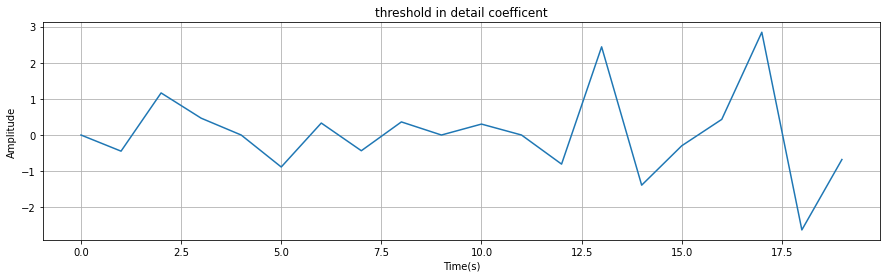

In [41]:
sigma_Detail = (np.median(detail_coeff)/0.6745)
threshold_Detail =sigma_Detail*(np.sqrt(2*np.log(len(detail_coeff))))
detail_thres = pywt.threshold(detail_coeff,threshold_Detail,mode="hard")
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(detail_thres)
plt.title("threshold in detail coefficent")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

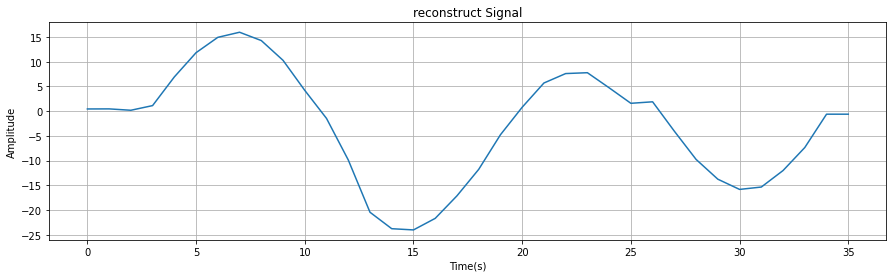

In [42]:
reconstruct_signal= pywt.idwt(approxi_thres,detail_thres, wavelet='db3', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(reconstruct_signal)
plt.title("reconstruct Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# **3**

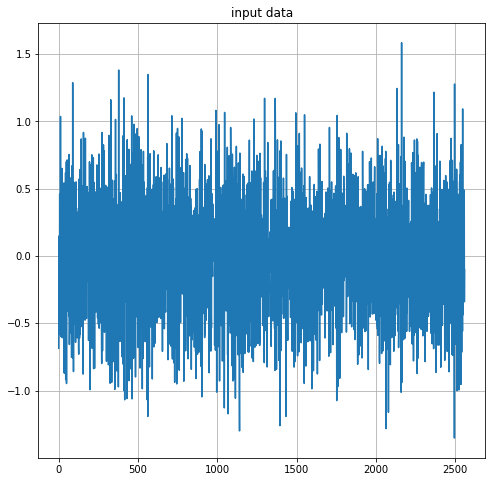

In [19]:
column_name=['A','B','C','D','E','F']
data=pd.read_csv('/content/acc_00003.csv',names=column_name)
d=data['F']
plt.figure(figsize=(8,8))
plt.plot(d)
plt.grid()
plt.title("input data")
plt.show()

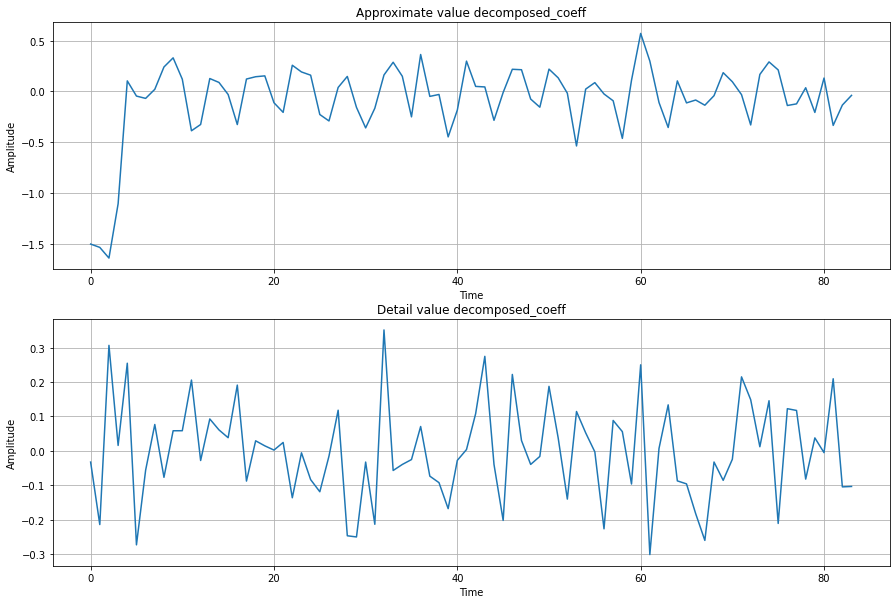

In [46]:
approx_coeff= pywt.downcoef('a',d, 'db3', mode='sym', level=5)
detail_coeff = pywt.downcoef('d',d, 'db3', mode='sym', level=5)

decomposed_coeff= [approx_coeff,detail_coeff]
title_name= ["Approximate value","Detail value"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(decomposed_coeff)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(decomposed_coeff[k])
    plt.title(str(title_name[k])+" decomposed_coeff")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid()
    c =c+1 

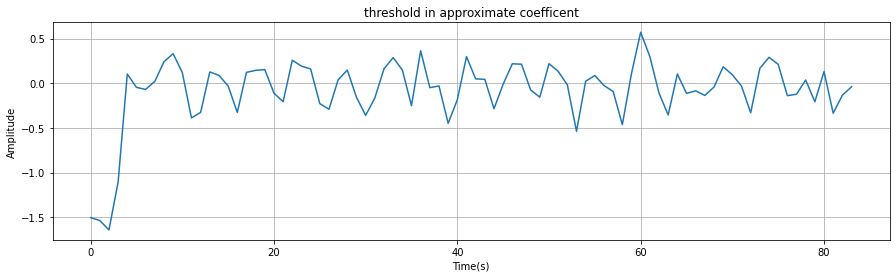

In [47]:
sigma_Approx = (np.median(approx_coeff)/0.6745)

threshold_Approx = sigma_Approx*(np.sqrt(2*np.log(len(approx_coeff))))

approxi_thres = pywt.threshold(approx_coeff,threshold_Approx,mode= 'hard')
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(approxi_thres)
plt.title("threshold in approximate coefficent")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

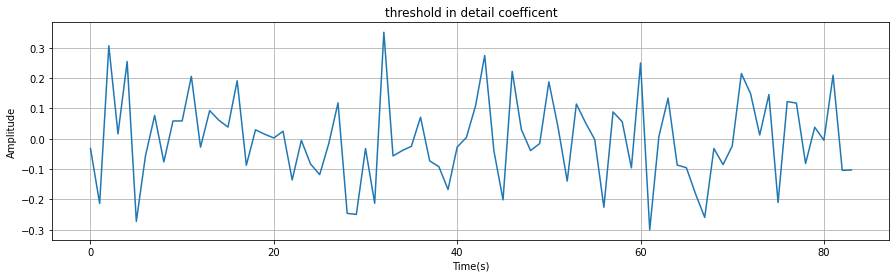

In [48]:
sigma_Detail = (np.median(detail_coeff)/0.6745)
threshold_Detail =sigma_Detail*(np.sqrt(2*np.log(len(detail_coeff))))
detail_thres = pywt.threshold(detail_coeff,threshold_Detail,mode="hard")
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(detail_thres)
plt.title("threshold in detail coefficent")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

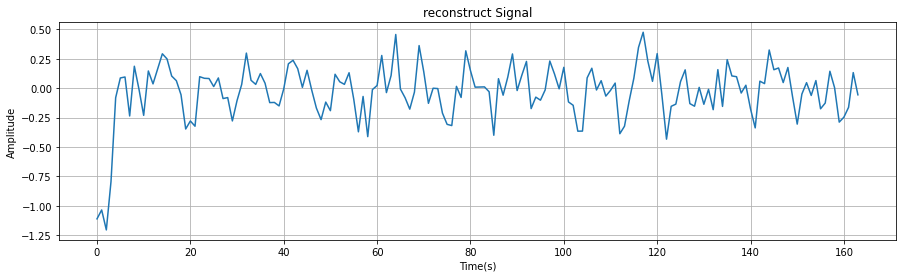

In [50]:
reconstruct_signal= pywt.idwt(approxi_thres,detail_thres, wavelet='db3', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(reconstruct_signal)
plt.title("reconstruct Signal")
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [16]:
def MA(signal,p):
  ma=list()
  for i in range(p,len(signal)):
    avg=0
    for j in range(p):
      avg+=(signal[i-j-1])/p
    ma.append(avg)
  return np.array(ma)

   

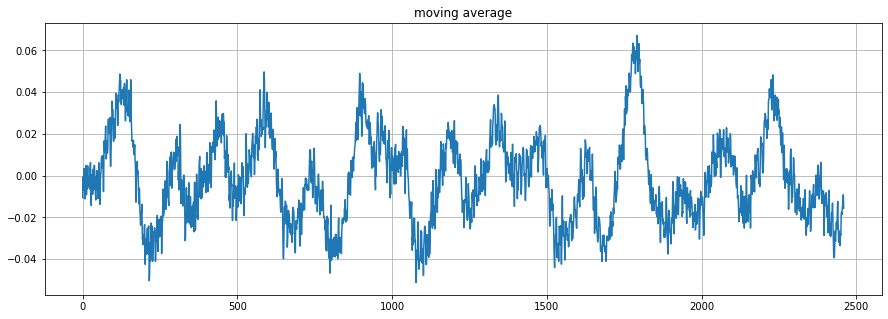

In [45]:

out=MA(d,100)
plt.figure(figsize=(15,5))
plt.plot(out)
plt.grid()
plt.title("moving average")
plt.show()